# Stock Portfolio Optimization

In this notebook, I will optimize a portfolio consisting of 10 stocks over a 4-year period from January 2017 through December 2020. The stocks of interest and their respective industries are listed below:

    Pharmaceuticals:
        1) Pfizer
        2) Amgen
        3) Moderna
    
    Oil & Gas:
        4) Exxon
        5) Shell
        6) Chevron
        
    Technology:
        7) Google
        8) Meta
        9) Microsoft
        10) Lyft

### Obtaining and processing the stock data

In [203]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [204]:
#Creating the list of symbols for stocks in the portfolio
stock_symbols = ['PFE','AMGN','MRNA','XOM','RDS-B','CVX','GOOG','FB','MSFT','LYFT']

In [205]:
#Getting the stock data
stock_dfs = []
start_date = '2017-01-01'
end_date = '2021-01-01'
for i in stock_symbols:
    df = yf.download(i,start_date,end_date)
    stock_dfs.append(df)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [206]:
#Viewing the data
for i in range(len(stock_symbols)):
    print(i+1,".",stock_symbols[i])
    print(stock_dfs[i].head())
    print('\n')

1 . PFE
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2017-01-03  31.024668  31.309298  30.920303  31.309298  25.928757  23391844
2017-01-04  31.432638  31.641365  31.337761  31.584440  26.156618  22753963
2017-01-05  31.660341  31.963947  31.423149  31.888046  26.408045  21083584
2017-01-06  31.935484  31.973434  31.631880  31.764706  26.305906  18418228
2017-01-09  31.717268  31.944971  31.669828  31.755219  26.298042  21559886


2 . AMGN
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-03  147.860001  151.000000  147.119995  150.729996  131.576523   
2017-01-04  152.089996  153.720001  151.770004  152.869995  133.444565   
2017-01-05  152.720001  153.399994  151.509995  152.979996  133.540573   
2017-01-06  159.880005  161.000000  156.669998  156.779999  136.857712   
2017-

### Processing the stock data and calculating expected returns

To calculate the return, I will use the percent change in adjusted closing price.

In [207]:
#Joining the individual stock data into one big dataset
all_stocks_df = pd.DataFrame(index=stock_dfs[0].index)
for i in range(len(stock_symbols)):
    all_stocks_df[stock_symbols[i]] = stock_dfs[i]['Adj Close']

In [208]:
#Viewing the data
all_stocks_df.head(10)

,PFE,AMGN,MRNA,XOM,RDS-B,CVX,GOOG,FB,MSFT,LYFT
Date,,,,,,,,,,
2017-01-03,25.928757,131.576523,NaN,69.992752,50.731842,95.398186,786.140015,116.860001,58.291965,NaN
2017-01-04,26.156618,133.444565,NaN,69.222664,51.025188,95.373909,786.900024,118.690002,58.031151,NaN
2017-01-05,26.408045,133.540573,NaN,68.190773,51.240883,94.961075,794.020020,120.669998,58.031151,NaN
2017-01-06,26.305906,136.857712,NaN,68.152267,50.826748,94.580612,806.150024,123.410004,58.534153,NaN
2017-01-09,26.298042,138.655975,NaN,67.027939,49.894947,93.771118,806.650024,124.900002,58.347855,NaN
2017-01-10,26.274477,138.586105,NaN,66.173157,49.679245,93.058754,804.789978,124.349998,58.329224,NaN
2017-01-11,25.795183,136.718018,NaN,66.850822,50.559284,93.843979,807.909973,126.089996,58.860165,NaN
2017-01-12,25.614468,135.618149,NaN,66.488892,50.774982,94.030159,806.359985,126.620003,58.319908,NaN
2017-01-13,25.551607,136.281586,NaN,66.496567,50.619678,94.208244,807.880005,128.339996,58.403751,NaN


In [209]:
#Calculating returns as percent change
stocks_returns = all_stocks_df.pct_change()

In [210]:
#Viewing this data
stocks_returns

,PFE,AMGN,MRNA,XOM,RDS-B,CVX,GOOG,FB,MSFT,LYFT
Date,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.008788,0.014197,NaN,-0.011002,0.005782,-0.000254,0.000967,0.015660,-0.004474,NaN
2017-01-05,0.009612,0.000719,NaN,-0.014907,0.004227,-0.004329,0.009048,0.016682,0.000000,NaN
2017-01-06,-0.003868,0.024840,NaN,-0.000565,-0.008082,-0.004007,0.015277,0.022707,0.008668,NaN
2017-01-09,-0.000299,0.013140,NaN,-0.016497,-0.018333,-0.008559,0.000620,0.012074,-0.003183,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,-0.004541,-0.000045,-0.053322,-0.004070,-0.007525,-0.004201,0.003735,-0.002648,0.007827,-0.024166
2020-12-28,-0.012074,0.003230,-0.097172,0.003365,-0.004958,-0.005039,0.021416,0.035901,0.009921,0.018625
2020-12-29,0.006247,0.014397,0.026840,-0.011260,0.008206,-0.003416,-0.009780,-0.000794,-0.003601,-0.010448


As the expected return depends of the weights of the stocks of in the portfolio, I will write a function that takes a given weight vector and yields the expected return as the output. The expected returns will be calculated through the following process:

    1) Find the mean returns for each stock over the fixed time period
    2) Compute the weighted average of the returns

In [211]:
#Defining a function to calculate the expected returns
def calculate_exp_returns(weight_vector):
    
    #step 1
    mean_returns = stocks_returns.mean(axis=0)
    
    #step 2
    exp_return = np.dot(mean_returns,weight_vector)
    
    return exp_return
    

In [212]:
#Finding the expected return of a portfolio with uniform weights
weights = [0.1]*10
exp_returns = calculate_exp_returns(weights)
print("The expected return for this portfolio is",np.round(exp_returns,5))

The expected return for this portfolio is 0.00088


### Calculating the risk of a portfolio

I will write a function to compute the risk of a portfolio with a given weight. This will be calculated through the following process:

    1) Find the annual covariance of the portfolio
    2) Multiply the covariance matrix by the weights to obtain the portfolio variance
    3) Take the square root of the portfolio variance, which yields standard deviation

The standard deviation of the portfolio is equal to its volatility or risk.

In [213]:
#Defining the function to calculate risk
def calculate_risk(weight_vector):
    
    #step 1
    cov_mat = stocks_returns.cov() #finding the covariance
    cov_mat = cov_mat * 252 #finding the annual covariance by multiplying the cov matrix by the number of trading days per year
    
    #step 2
    var = np.matmul(weight_vector,np.matmul(cov_mat,weight_vector))
    
    #step 3
    std_dev = np.sqrt(var)
    risk = std_dev
    
    return risk

In [214]:
#Finding the risk of a portfolio with uniform weights
weights = [0.1]*10
risk = calculate_risk(weights)
print("The risk of this portfolio is ",np.round(risk,3))

The risk of this portfolio is  0.259


### Plotting the efficient frontier

To plot the efficient frontier, I will randomly create 20,000 weight vectors, calculate the annual risk and the expected returns for the corresponding portfolios, and plot these quantities on a scatterplot.

In [215]:
#Creating lists for storing the expected returns and risks
iteration = []
weight_vectors = []
annual_risks = []
expected_returns = []

In [216]:
#Finding the expected returns for 100,000 randomly created weights
for i in range(20000):
    
    iteration.append(i)
    
    weights = np.random.random(10)
    weights = weights/weights.sum()
    weight_vectors.append(weights)
    
    risk = calculate_risk(weights)
    annual_risks.append(risk)
    
    exp_return = calculate_exp_returns(weights)
    expected_returns.append(exp_return) 

In [217]:
#Creating a dataframe for storing these datapoints
df = pd.DataFrame()
df['Iteration'] = iteration
df['Weights'] = weight_vectors
df['Annual Risk'] = annual_risks
df['Expected Returns'] = expected_returns
df = df.set_index('Iteration')

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Annual Risk', ylabel='Expected Returns'>

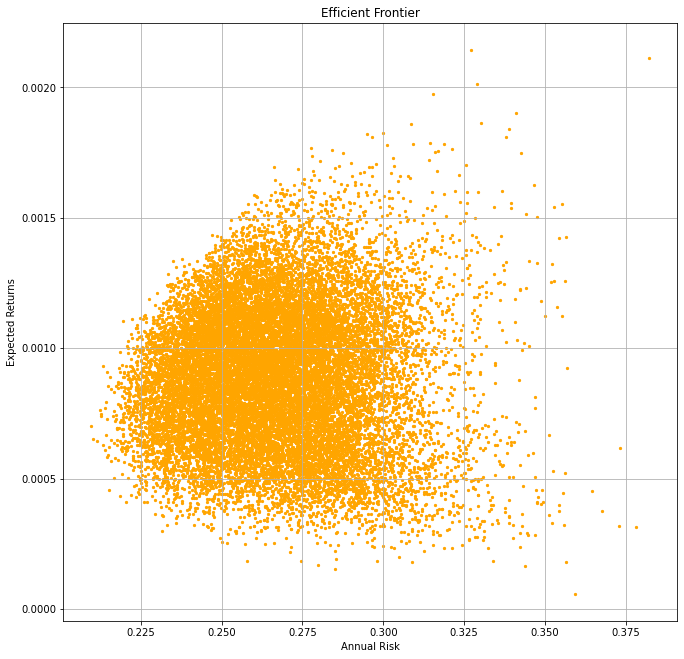

In [218]:
#Plotting the portfolios to obtain the efficient frontier
df.plot.scatter(x='Annual Risk', y='Expected Returns', title='Efficient Frontier',color='orange',grid=True, figsize = [11,11],s=5)

### Finding the optimal portfolio using Sharpe ratio

To find the optimal portfolio, I will calculate the Sharpe ratio, the formula of which is given below:

    Sharpe ratio = (expected return - risk free rate)/volatility
    
I will definite the risk-free rate to 0.001. Of the 20,000 previously constructed portfolios, the one with the maximum Sharpe ratio will be chosen as the optimal portfolio.

In [243]:
#Calculating Sharpe ratio for each portfolio
risk_free_rate = 0.001
Sharpe_ratios = []
for i in df.index:
    exp_ret = df.loc[i]['Expected Returns']
    volatility = df.loc[i]['Annual Risk']
    s_r = (exp_ret-risk_free_rate)/volatility
    Sharpe_ratios.append(s_r)

df['Sharpe ratios'] = Sharpe_ratios

In [244]:
#Finding the portfolio with the highest Sharpe ratio
opt_portfolio = df.loc[df['Sharpe ratios'].argmax()]
print("The optimal stock portfolio has the following weights for each stock:\n")
for i in range(len(stock_symbols)):
    print('\t',stock_symbols[i],': ',np.round(opt_portfolio['Weights'][i],3))
print('\nThe expected return of this portfolio is ',np.round(opt_portfolio['Expected Returns'],5))
print("\nThe risk of this portfolio is ",np.round(opt_portfolio['Annual Risk'],5))

The optimal stock portfolio has the following weights for each stock:

	 PFE :  0.048
	 AMGN :  0.001
	 MRNA :  0.311
	 XOM :  0.02
	 RDS-B :  0.002
	 CVX :  0.012
	 GOOG :  0.234
	 FB :  0.073
	 MSFT :  0.252
	 LYFT :  0.048

The expected return of this portfolio is  0.00214

The risk of this portfolio is  0.32722


In [245]:
#Finding the portfolio with the minimum risk
least_risk_portfolio = df.loc[df['Annual Risk'].argmin()]
print("The stock portfolio with the lowest risk has the following weights for each stock:\n")
for i in range(len(stock_symbols)):
    print('\t',stock_symbols[i],': ',np.round(least_risk_portfolio['Weights'][i],3))
print('\nThe expected return of this portfolio is ',np.round(least_risk_portfolio['Expected Returns'],5))
print("\nThe risk of this portfolio is ",np.round(least_risk_portfolio['Annual Risk'],5))

The stock portfolio with the lowest risk has the following weights for each stock:

	 PFE :  0.282
	 AMGN :  0.246
	 MRNA :  0.037
	 XOM :  0.038
	 RDS-B :  0.035
	 CVX :  0.093
	 GOOG :  0.159
	 FB :  0.094
	 MSFT :  0.003
	 LYFT :  0.011

The expected return of this portfolio is  0.0007

The risk of this portfolio is  0.20969


In [250]:
#Finding the portfolio with the maximum returns
max_ret_portfolio = df.loc[df['Expected Returns'].argmax()]
print("The stock portfolio with the maximum returns has the following weights for each stock:\n")
for i in range(len(stock_symbols)):
    print('\t',stock_symbols[i],': ',np.round(max_ret_portfolio['Weights'][i],3))
print('\nThe expected return of this portfolio is ',np.round(max_ret_portfolio['Expected Returns'],5))
print("\nThe risk of this portfolio is ",np.round(max_ret_portfolio['Annual Risk'],5))

The stock portfolio with the maximum returns has the following weights for each stock:

	 PFE :  0.048
	 AMGN :  0.001
	 MRNA :  0.311
	 XOM :  0.02
	 RDS-B :  0.002
	 CVX :  0.012
	 GOOG :  0.234
	 FB :  0.073
	 MSFT :  0.252
	 LYFT :  0.048

The expected return of this portfolio is  0.00214

The risk of this portfolio is  0.32722


We can see that the portfolio that optimizes the Sharpe ratio is the same portfolio that maximizes returns. This means that the risk associated with portfolios containing this particular assortment of stocks is very low and therefore has a very small impact on the Sharpe ratios. Therefore, to optimize this portfolio, one simply needs to optimize the returns.

For visualization, I have plotted the portfolios that maximize Sharpe ratio (green star) and that minimizes risk (blue dot) on the efficient frontier.

Text(0, 0.5, 'Expected Returns')

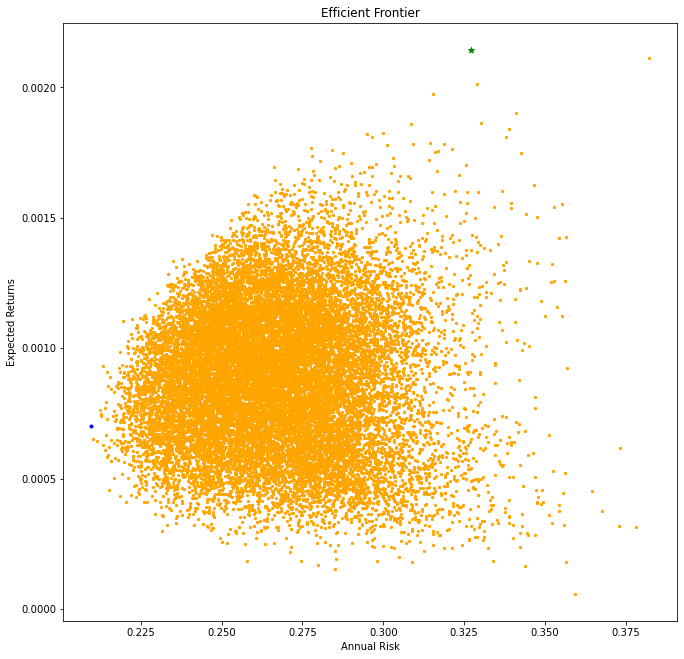

In [251]:
#Plotting these portfolios on the efficient frontier
plt.subplots(figsize=[11,11])
plt.scatter(df['Annual Risk'],df['Expected Returns'],color='orange',s=5)
plt.scatter(opt_portfolio['Annual Risk'],opt_portfolio['Expected Returns'],marker='*',color='green')
plt.scatter(least_risk_portfolio['Annual Risk'],least_risk_portfolio['Expected Returns'],marker='.',color='blue')
plt.title('Efficient Frontier')
plt.xlabel('Annual Risk')
plt.ylabel('Expected Returns')